Monte Carlo Call Price: 10.4739
Analytical Call Price:  10.4506
Monte Carlo Put Price:  5.5742
Analytical Put Price:   5.5735
Comparision: The Prices are similar


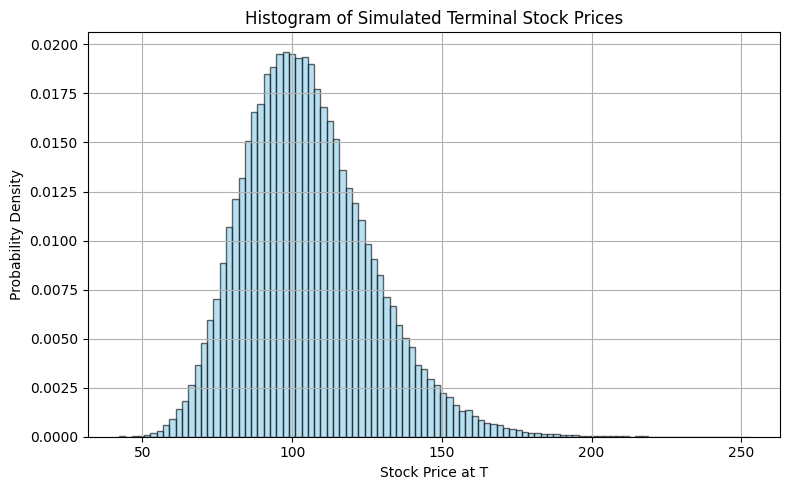

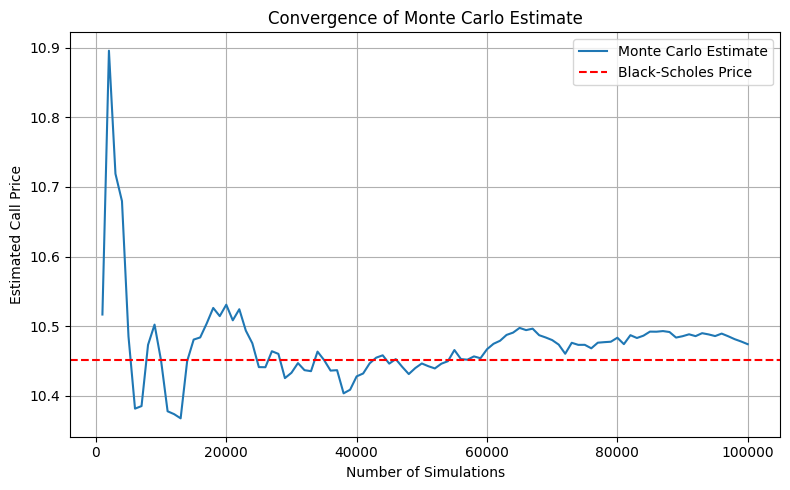

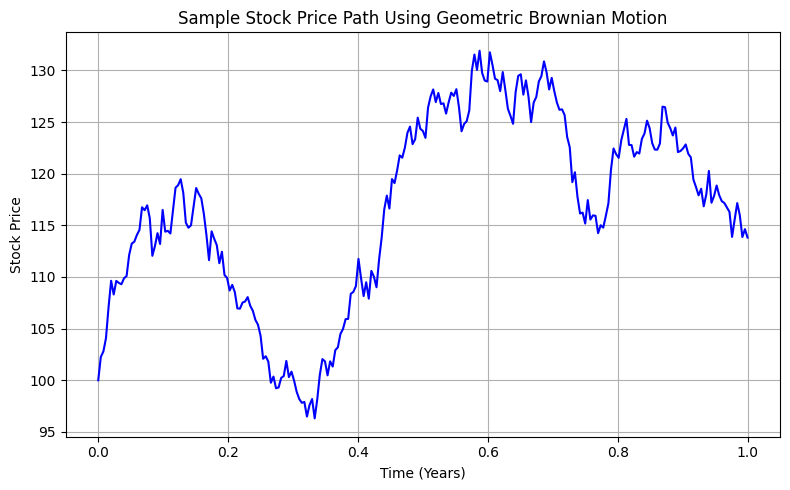

Simulation Runtime: 0.08 seconds


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

# Suggested Parameters
S0 = 100
K = 100
T = 1.0
r = 0.05
sigma = 0.2
N = 100000

# Analytical Black-Scholes solution
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Monte Carlo Simulation
np.random.seed(42)
Z = np.random.standard_normal(N)
ST = S0 * np.exp((r - 0.5 * sigma**2)*T + sigma * np.sqrt(T) * Z)


# Estimate option prices
call_payoffs = np.maximum(ST - K, 0)
put_payoffs = np.maximum(K - ST, 0)
call_price_mc = np.exp(-r * T) * np.mean(call_payoffs)
put_price_mc = np.exp(-r * T) * np.mean(put_payoffs)


# Analytical prices
call_price_bs = black_scholes_call(S0, K, T, r, sigma)
put_price_bs = black_scholes_put(S0, K, T, r, sigma)

# Output
print(f"Monte Carlo Call Price: {call_price_mc:.4f}")
print(f"Analytical Call Price:  {call_price_bs:.4f}")
print(f"Monte Carlo Put Price:  {put_price_mc:.4f}")
print(f"Analytical Put Price:   {put_price_bs:.4f}")
print("Comparision: The Prices are similar")
# Histogram of terminal stock prices
plt.figure(figsize=(8, 5))
plt.hist(ST, bins=100, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.title("Histogram of Simulated Terminal Stock Prices")
plt.xlabel("Stock Price at T")
plt.ylabel("Probability Density")
plt.grid(True)
plt.tight_layout()
plt.show()

# Convergence plot
sim_counts = np.linspace(1000, N, 100, dtype=int)
convergence = []
start_time = time.time()
for count in sim_counts:
    payoff_sample = np.maximum(S0 * np.exp((r - 0.5 * sigma**2)*T + sigma * np.sqrt(T) * Z[:count]) - K, 0)
    convergence.append(np.exp(-r * T) * np.mean(payoff_sample))
end_time = time.time()

plt.figure(figsize=(8, 5))
plt.plot(sim_counts, convergence, label='Monte Carlo Estimate')
plt.axhline(y=call_price_bs, color='red', linestyle='--', label='Black-Scholes Price')
plt.xlabel("Number of Simulations")
plt.ylabel("Estimated Call Price")
plt.title("Convergence of Monte Carlo Estimate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Stock Price Change Using GBM
steps = 252  # Daily steps in a year
dt = T / steps
S_path = np.zeros(steps + 1)
S_path[0] = S0
np.random.seed(0)
for t in range(1, steps + 1):
    Z_t = np.random.normal()
    S_path[t] = S_path[t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z_t)

plt.figure(figsize=(8, 5))
plt.plot(np.linspace(0, T, steps + 1), S_path, color='Blue')
plt.title("Sample Stock Price Path Using Geometric Brownian Motion")
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()


print(f"Simulation Runtime: {end_time - start_time:.2f} seconds")
